<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_14_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 14: Principal Component Analysis


---


The fundamental objective of PCA is to reduce dimensionality in a dataset. However, this approach can also be implemented in image compression. PCA uses orthogonal transformations to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. These are meant to represent the original dataset with less variables, which are selected by their eigenvalues and eigenvectors.

In this tutorial, you will see how to implement this method with images as well as other exercises to manipulate image datasets and sequential images. 

## 1. Loading an image, and importing resources.



Shape: (850, 767)


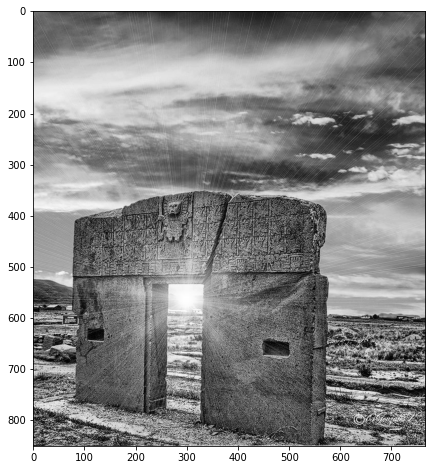

In [ ]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import os, requests
import numpy as np

img_data = requests.get("http://2.bp.blogspot.com/-41R7xUxk0MI/VX3bq1X4wPI/AAAAAAAAA9s/6aIfdUwh_y4/s1600/11209579_431786763660187_2553976445473050475_n.jpg" , verify=False).content
with open('11209579_431786763660187_2553976445473050475_n.jpg', 'wb') as handler:
    handler.write(img_data)

# Load the image 
image = cv2.imread('11209579_431786763660187_2553976445473050475_n.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Convert the image to gray Scale
grayscale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print("Shape:", grayscale.shape)

plt.figure(figsize=(8,8))
plt.imshow(grayscale, cmap="gray")

## 2. Implement PCA

explained_variance_ratio_: [0.28168956 0.13516304 0.11307082 0.04330607 0.0358741  0.02392296
 0.019218   0.01658623 0.01184029 0.0107767  0.00860085 0.00815757
 0.00758092 0.00733662 0.0063951  0.00547746 0.00524843 0.00497182
 0.00430728 0.00419831 0.00389305 0.00370493 0.00365338 0.00338025
 0.00333881 0.003107   0.00303639 0.00286013 0.00271676 0.00259715
 0.00255203 0.00250395 0.00241144 0.00233233 0.00230728]


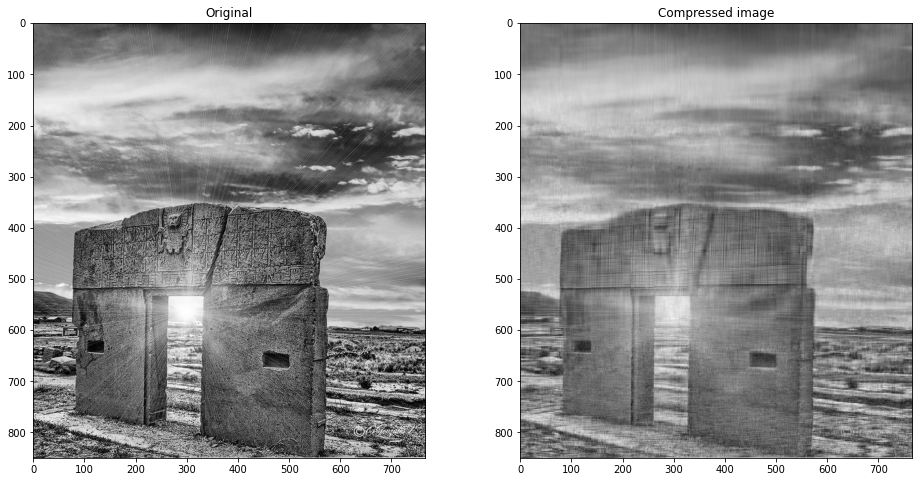

In [ ]:
# The PCA module in Sklearn is the most known implementation of PCA.
from sklearn.decomposition import PCA

# First, let's define the number of principal components
n_comp = 35

# Initialize PCA
pca = PCA(n_components=n_comp)

# Standardize the data, so all instances have 0 as the center
pca.fit(grayscale) 

# Find the (n_comp) number of principal components and remove the less important 
# Theres's also another function that joins fit and tranform: pca.Fit_transform()
principal_components = pca.transform(grayscale) 

# PCA.transform also finds the explained_variance_ratio_ , 
# which shows the % of variance explained by each component
print("explained_variance_ratio_:",pca.explained_variance_ratio_)

# Since PCA reduces the number of columns, we will need to transform the results 
# to the original space to display the compressed image
temp = pca.inverse_transform(principal_components) 

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))

ax1.set_title('Original')
ax1.imshow(grayscale, cmap='gray')

ax2.set_title('Compressed image')
ax2.imshow(temp, cmap='gray')

## 3. PCA for Colour images

- Extract Channels

Image shape:  (380, 380, 3)


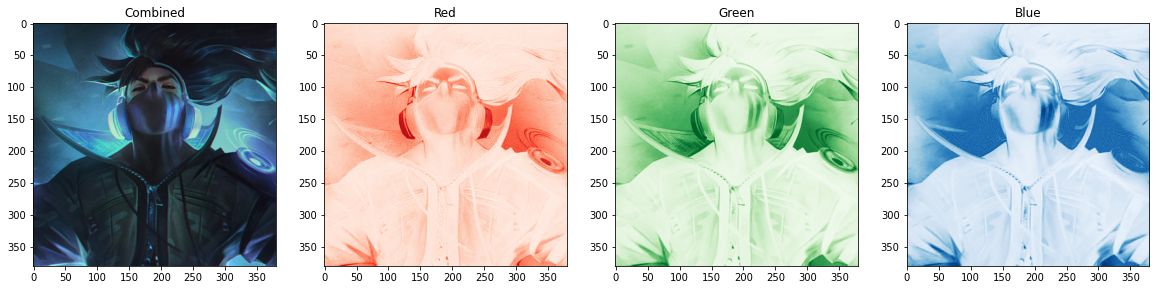

In [ ]:
image = cv2.imread('pca.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

print("Image shape: ", image.shape)

# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('Combined')
ax1.imshow(image, cmap="Reds")

ax2.set_title('Red')
ax2.imshow(r, cmap="Reds")

ax3.set_title('Green')
ax3.imshow(g, cmap="Greens")

ax4.set_title('Blue')
ax4.imshow(b, cmap="Blues")

- Implement PCA on each colour channel

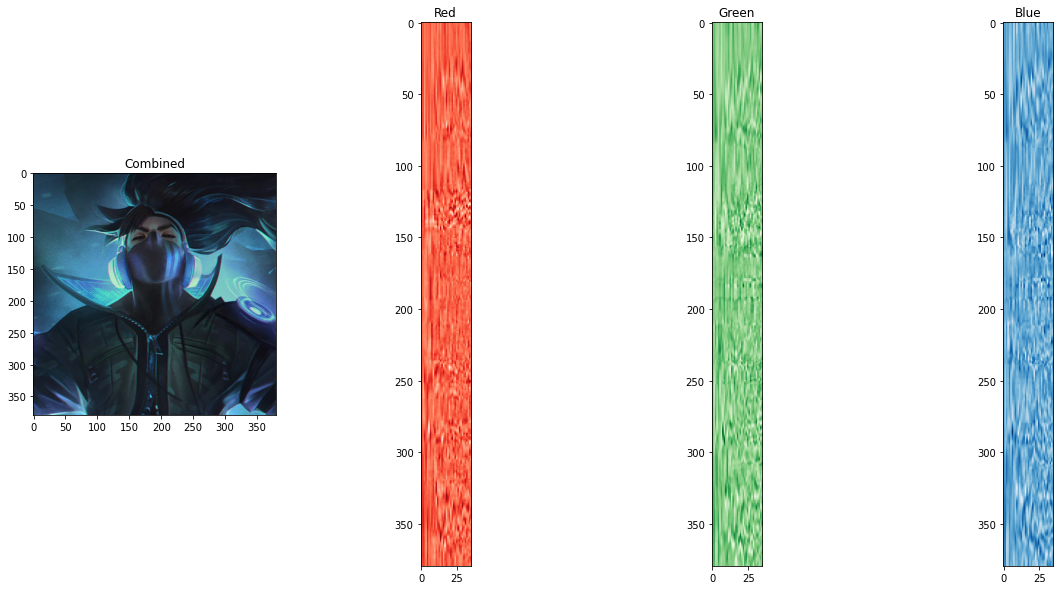

In [ ]:
channels = [r,g,b]

res = []

for channel in range(3):
    # PCA
    pca = PCA(n_components = 35)
    channel_pca = pca.fit_transform(channels[channel])
    
    pca_dict = {"projections": channel_pca, 
                "components": pca.components_}

    res.append(pca_dict)

# Visualize the principal components of each colour channel
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('Combined')
ax1.imshow(image, cmap="Reds")

ax2.set_title('Red')
ax2.imshow(np.transpose(res[0]["components"]), cmap="Reds")

ax3.set_title('Green')
ax3.imshow(np.transpose(res[1]["components"]), cmap="Greens")

ax4.set_title('Blue')
ax4.imshow(np.transpose(res[2]["components"]), cmap="Blues")

## 4. PCA for an Entire Dataset

- Import a dataset


In [ ]:
import os

if not os.path.exists('lfwcrop_grey'):
    !wget http://conradsanderson.id.au/lfwcrop/lfwcrop_grey.zip
    !unzip 'lfwcrop_grey.zip'

filenames = []
images = []

for filename in os.listdir('lfwcrop_grey/faces'):
  filenames.append(filename)
  image = cv2.imread("lfwcrop_grey/faces/"+filename)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  images.append(image)

images = np.array(images)

print('Total Number of Faces:', len(images))
print(images.shape)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: lfwcrop_grey/faces/Paul_Coppin_0001.pgm  
  inflating: lfwcrop_grey/faces/Herta_Daeubler-Gmelin_0002.pgm  
  inflating: lfwcrop_grey/faces/Richard_Myers_0009.pgm  
  inflating: lfwcrop_grey/faces/Kaye_Young_0001.pgm  
  inflating: lfwcrop_grey/faces/Juan_Ignacio_Chela_0002.pgm  
  inflating: lfwcrop_grey/faces/Paul_Wollnough_0001.pgm  
  inflating: lfwcrop_grey/faces/Carolina_Moraes_0002.pgm  
  inflating: lfwcrop_grey/faces/Charles_Taylor_0007.pgm  
  inflating: lfwcrop_grey/faces/George_W_Bush_0006.pgm  
  inflating: lfwcrop_grey/faces/Ian_Gillan_0001.pgm  
  inflating: lfwcrop_grey/faces/Shaun_Pollock_0001.pgm  
  inflating: lfwcrop_grey/faces/Junichiro_Koizumi_0022.pgm  
  inflating: lfwcrop_grey/faces/Steve_Mariucci_0002.pgm  
  inflating: lfwcrop_grey/faces/George_W_Bush_0214.pgm  
  inflating: lfwcrop_grey/faces/Paul_McCartney_0001.pgm  
  inflating: lfwcrop_grey/faces/Barry_Hinson_0001.pgm  
  infla

- Visualize the dataset

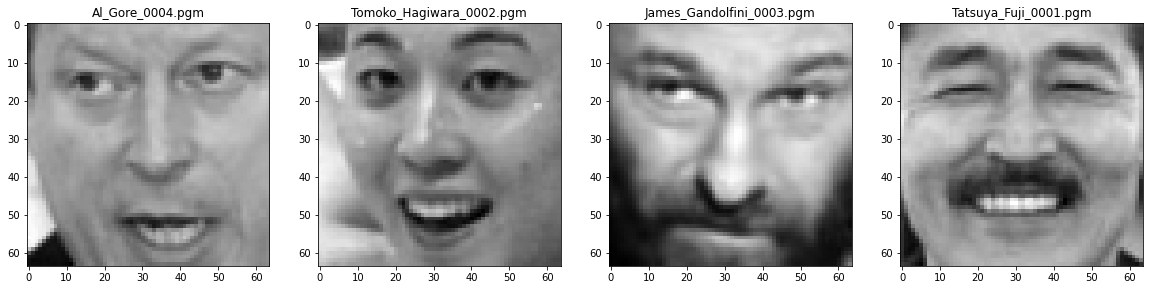

In [ ]:
num_images = 4

plt.figure(figsize=(20, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(images)))
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

- Implement PCA

In [ ]:
# X = images.reshape(13233, 64*64)
# print(X.shape)

res = []

num_images = len(images)
for i in range(num_images):

    # PCA
    pca = PCA(n_components = 35)
    single_pca = pca.fit_transform(images[i])
    
    pca_dict = {"projections": single_pca, 
                "components": pca.components_}

    res.append(pca_dict)

print(len(res))

13233


# Exercise 1: Compression evaluation
Compressed images can be evaluated based on the memory size reduction and percentage on how good they can depict the original image. In this exercise, you will need to implement PCA, FFT2, JPEG compression to the same dataset (you can find a dataset on Google Dataset Search or UCI repository) and evaluate which method is better in terms of memory reduction. 

## Loading the dataset to the workspace

A dataset of images of groups of people will be used, extracted from the resources available at (http://chenlab.ece.cornell.edu/projects/).

In [ ]:
import os

if not os.path.exists('ImagesOfGroups'):
    !wget http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/Fam4a.zip
    !unzip 'Fam4a.zip'

!rm -rf /content/Fam4a/.ipynb_checkpoints
!rm -rf /content/Fam4a/*.txt

filenames = []
images = []

for filename in os.listdir('Fam4a/'):
  filenames.append(filename)
  image = cv2.imread("Fam4a/"+filename)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  images.append(image)

images = np.array(images)

print('Total Number of Images:', len(images))

--2021-04-23 16:49:18--  http://chenlab.ece.cornell.edu/projects/ImagesOfGroups/Fam4a.zip
Resolving chenlab.ece.cornell.edu (chenlab.ece.cornell.edu)... 128.253.97.40
Connecting to chenlab.ece.cornell.edu (chenlab.ece.cornell.edu)|128.253.97.40|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45067379 (43M) [application/zip]
Saving to: ‘Fam4a.zip’

Fam4a.zip           100%[===================>]  42.98M  80.5MB/s    in 0.5s    

2021-04-23 16:49:18 (80.5 MB/s) - ‘Fam4a.zip’ saved [45067379/45067379]

Archive:  Fam4a.zip
replace Fam4a/1000887309_c2a3b6445e_1357_40124061@N00.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Fam4a/1000887309_c2a3b6445e_1357_40124061@N00.jpg  
  inflating: Fam4a/1003227459_6165537cc6_1230_82312837@N00.jpg  
  inflating: Fam4a/1003649130_b82441765c_1028_41324968@N00.jpg  
  inflating: Fam4a/1004418060_e1b03900cc_1128_52888429@N00.jpg  
  inflating: Fam4a/1011184800_cbe1b6f2f6_1222_10952553@N06.jpg  
  inflating: Fam4a/10296327

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


As can be seen in the cell above, our dataset is composed of 367 images of different sizes in jpg format.

Four images were randomly selected from our database.

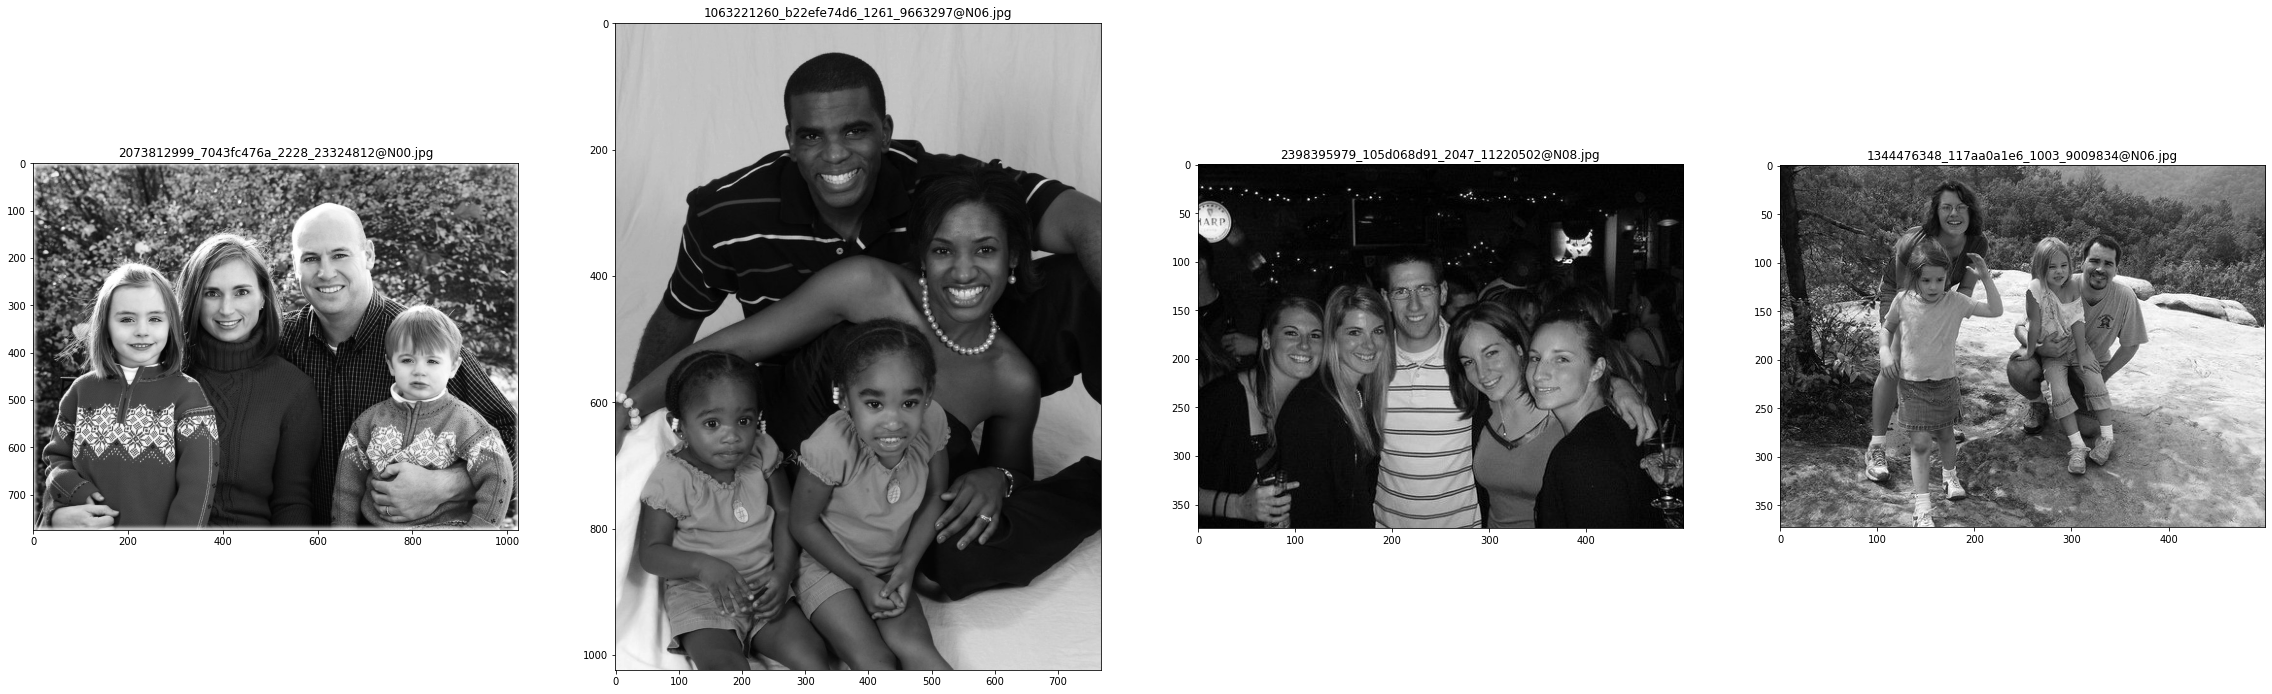

In [ ]:
num_images = 4
list_index = []

plt.figure(figsize=(40, 20))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    index = np.random.choice(range(len(res)))
    list_index.append(index)
    image = images[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

## PCA Image Compression

We will implement PCA compression by reducing the number of components in each image by 50%. To obtain the 50% of components of each image we took the ratio of the number of n_comp vs. the total number of columns in each image. This was thought of as an alternative to represent a compression ratio as would be done with FFT2 and JPEG compression.

In [ ]:
# The PCA module in Sklearn is the most known implementation of PCA.
from sklearn.decomposition import PCA
import timeit

start_time = timeit.default_timer()
pca_res = []
compression_percentage = 0.5

num_images = len(images)

for i in range(num_images):
  # Initialize PCA
  # Use the 50% as a compression percentage
  # Defining the n_comp as the 50% of the total image components (number of columns) for each image

  n_comp = int(compression_percentage*images[i].shape[1])
  pca = PCA(n_components=n_comp)

  # Standardize the data, so all instances have 0 as the center
  pca.fit(images[i]) 

  # Find the (n_comp) number of principal components and remove the less important 
  # Theres's also another function that joins fit and tranform: pca.Fit_transform()
  principal_components = pca.transform(images[i]) 

  # Since PCA reduces the number of columns, we will need to transform the results 
  # to the original space to display the compressed image
  temp = pca.inverse_transform(principal_components) 
  pca_res.append(temp)

elapsed = timeit.default_timer() - start_time
print(f'The time elapsed for executing this algorithm is: {elapsed}')

The time elapsed for executing this algorithm is: 261.56337577999875


As a next step, the 4 images previously selected from the dataset, were shown  after we applied PCA to it.

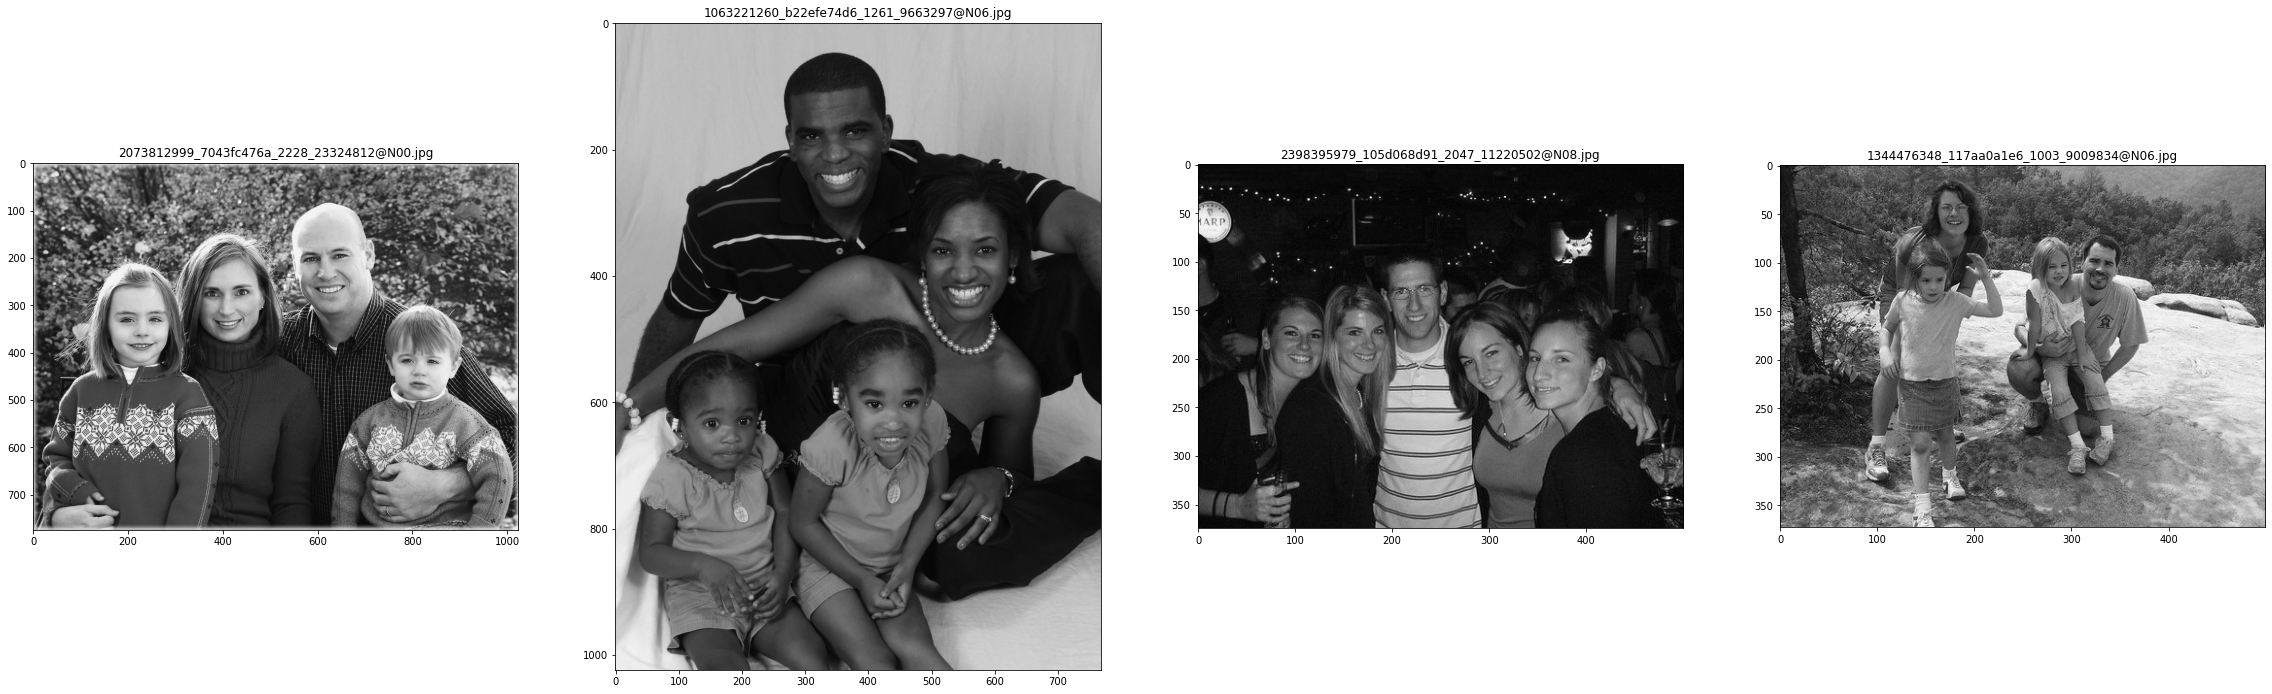

In [ ]:
num_images = 4

plt.figure(figsize=(40, 20))
for i,j in zip(range(num_images), range(0,4)):
    plt.subplot(1, num_images, i+1)
    index = list_index[i]
    image = pca_res[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

Running this algorithm took a total time of 261.56 seconds or the equivalent of four and a half minutes.

## FFT2 Image Compression

In a next stage, the FFT2 compression algorithm was applied, with a compression ratio of 50% to the entire dataset.

In [ ]:
fft2_res =[]
num_images = len(images)
start_time = timeit.default_timer()

for i in range(num_images):

    fourier = np.fft.fft2(images[i])
    sorted_fourier = np.sort(np.abs(fourier.reshape(-1)))

    # Find a threshold value according to the compression percentage
    threshold = sorted_fourier[int(np.floor(percentage*len(sorted_fourier)))]
    # Find smaller values than the threshold. Mark those values as 0 and bigger values as 1. 
    mask = np.abs(fourier)>threshold
    # Remove smaller values in the magnitude spectrum
    masked_image = fourier * mask

    compressed_image = np.fft.ifft2(masked_image).real

    fft2_res.append(compressed_image)

elapsed = timeit.default_timer() - start_time
print(f'The time elapsed for executing this algorithm is: {elapsed} seconds.')

The time elapsed for executing this algorithm is: 57.05782277400067 seconds.


Shown below are the 4 images previously selected from the dataset, after FFT2 compression algorithm were applied to the entire dataset.

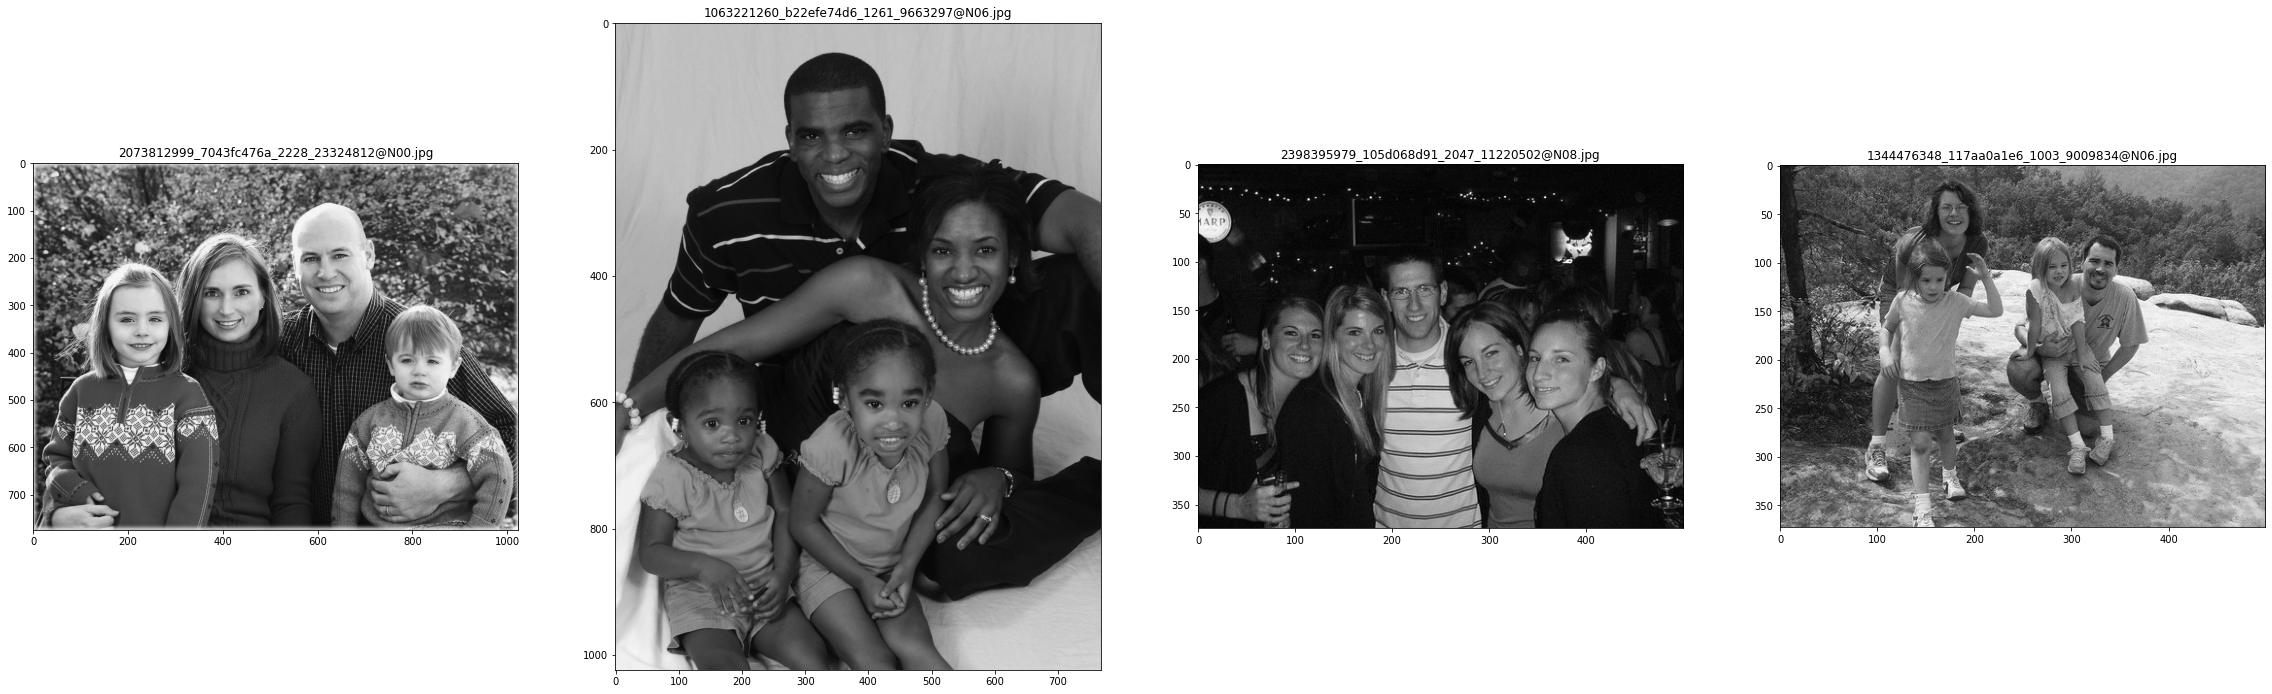

In [ ]:
num_images = 4

plt.figure(figsize=(40, 20))
for i,j in zip(range(num_images), range(0,4)):
    plt.subplot(1, num_images, i+1)
    index = list_index[i]
    image = fft2_res[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

Running this algorithm took a total time of 57.06 seconds or the equivalent of almost a minute.

## JPEG Image Compression

In a next stage, the JPEG compression algorithm was applied, with a compression ratio of 50% to the entire dataset.

In [ ]:
from scipy import fftpack
from numpy import r_

jpeg_res =[]
num_images = len(images)

start_time = timeit.default_timer()
for i in range(num_images):

    dct = np.zeros(images[i].shape)

    # Loop over small patches (8x8)
    for row in range(1,images[i].shape[0]//8+1):
      for col in range(1,images[i].shape[1]//8+1):
        aux = images[i][(row-1)*8: row*8, (col-1)*8: col*8]
        dct[(row-1)*8: row*8, (col-1)*8: col*8] = np.transpose(fftpack.dct(np.transpose(fftpack.dct(aux, norm = "ortho")), norm = "ortho"))

    # Sort the DCT transform from minor to mayor
    sorted_dct = np.sort(np.abs(dct.reshape(-1)))

    # Define threshold
    threshold = sorted_dct[int(np.floor(compression_percentage*len(sorted_dct)))]
    mask = np.abs(dct) > threshold
    dct_thresh = mask * dct

    def idct2(a):
        return np.transpose(fftpack.idct( np.transpose(fftpack.idct( a, axis=1 , norm='ortho')), norm='ortho'))

    imsize = images[i].shape
    im_dct = np.zeros(imsize)

    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
    
    jpeg_res.append(im_dct)
    
elapsed = timeit.default_timer() - start_time
print(f'The time elapsed for executing this algorithm is: {elapsed} seconds.')

The time elapsed for executing this algorithm is: 153.0257520769992 seconds.


Shown below are the 4 images previously selected from the dataset, after JPEG compression algorithm were applied to the entire dataset.

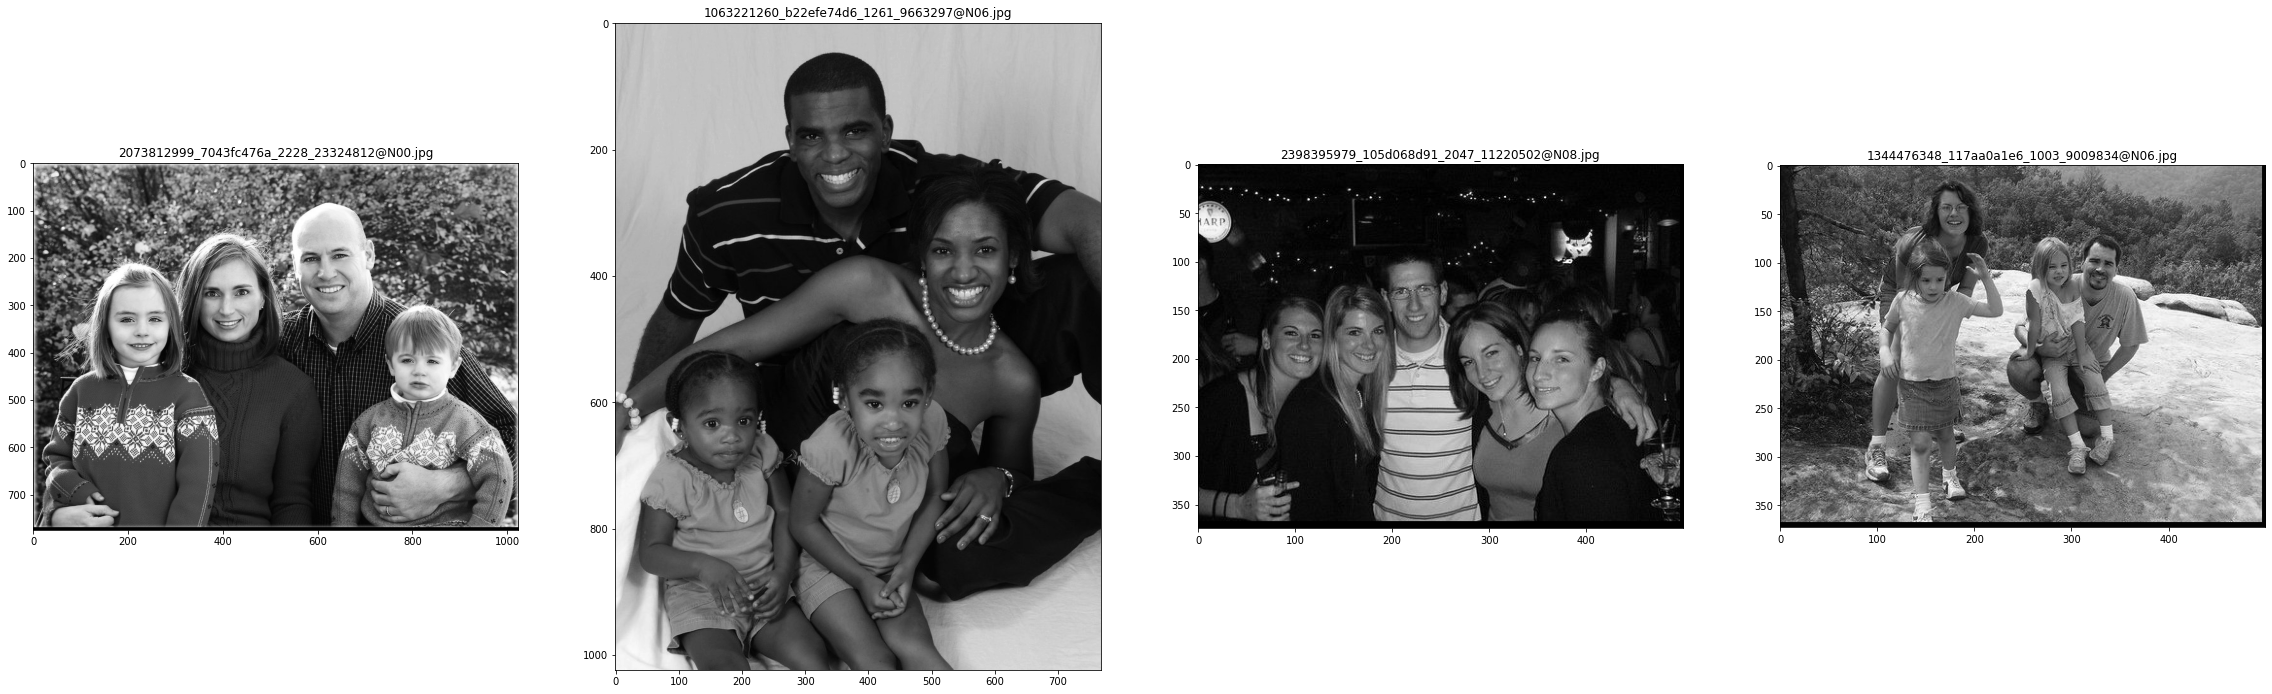

In [ ]:
num_images = 4

plt.figure(figsize=(40, 20))

for i,j in zip(range(num_images), range(0,4)):
    plt.subplot(1, num_images, i+1)
    index = list_index[i]
    image = jpeg_res[index]
    filename=filenames[index]
    plt.imshow(image, 'gray')
    plt.title(filename)

Running this algorithm took a total time of 153.02 seconds or the equivalent of almost 3 minutes.

## Closing remarks


As could be seen in the results obtained during the development of this tutorial, it was possible to obtain images with a compression of 50% with similar visual characteristics, that is to say that at first glance there are no very noticeable differences between the resulting images. 

To evaluate the performance of the algorithms studied in this tutorial we also timed the execution time for each algorithm and obtained the following times:

1. FFT2 -> 57.06 seconds.
2. JPEG -> 153.02 seconds.
3. PCA -> 261.56 seconds.

In view of this it could be said that the best compression method is FFT2 followed by JPEG and finally PCA. Although with the results obtained in this tutorial the previous comment is true, in reality to really evaluate the performance of the different algorithms it is necessary to use other metrics such as: memory usage, original data vs. compressed data ratio and others that are specific to each method, as for PCA would be to find a relationship between variances or for JPEG would be to find a blocking pattern in the resulting image. It is also worth mentioning that the number of components to be reduced for PCA compression is a parameter that must be chosen carefully to obtain the desired results, for example: for about 35 components, a rather pixelated image was obtained (with a great loss of information) and on the other hand, working with 50% of the number of columns of each image, a result quite similar to the original image was obtained.

With all of the above, although the resulting images were obtained with visually similar characteristics, in terms of execution time the best performance was obtained with FFT2, but as mentioned above, more parameters need to be measured to really know which of the 3 algorithms has the best performance.

## References
[1] https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html 